In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
df=pd.read_csv('/content/drug200.xls')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

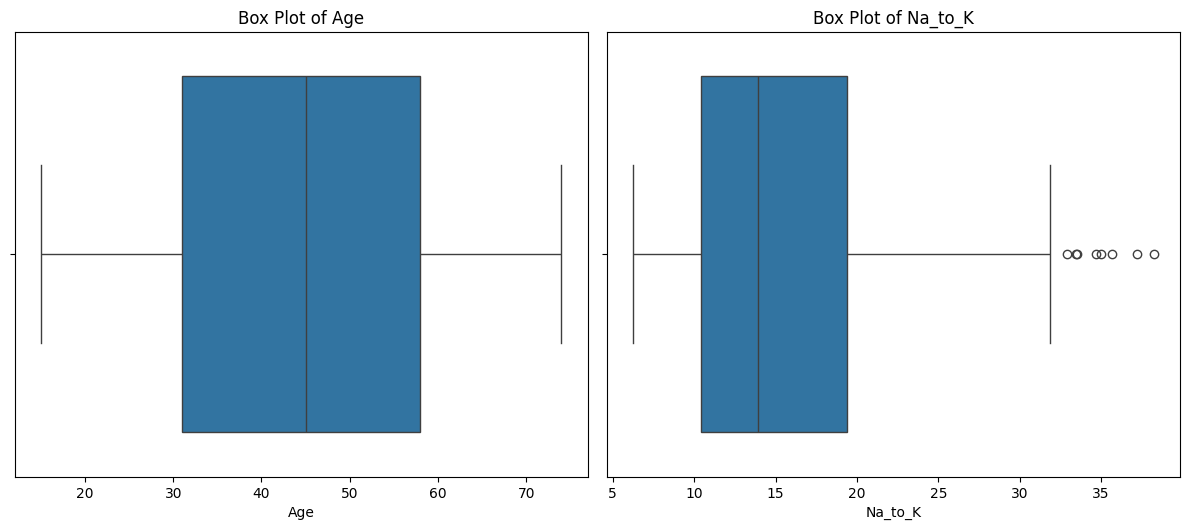

In [8]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['Na_to_K'])
plt.title('Box Plot of Na_to_K')

plt.tight_layout()
plt.show()


In [9]:
# Calculate the first and third quartiles
Q1 = df['Na_to_K'].quantile(0.25)
Q3 = df['Na_to_K'].quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Define the multiplier for Tukey's fences
k = 1.5

# Define the lower and upper bounds using Tukey's fences
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Find outlier indices
outlier_indices = (df['Na_to_K'] < lower_bound) | (df['Na_to_K'] > upper_bound)


In [10]:
outliers=outlier_indices.value_counts()
outliers

Na_to_K
False    192
True       8
Name: count, dtype: int64

In [12]:
# Replace outliers with the median value
median_value = df['Na_to_K'].median()
df.loc[outlier_indices, 'Na_to_K'] = median_value

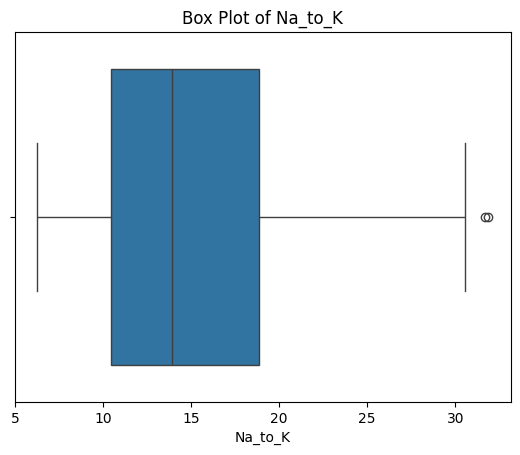

In [13]:
sns.boxplot(x=df['Na_to_K'])
plt.title('Box Plot of Na_to_K')

plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [15]:
le=LabelEncoder()

In [16]:
df['Sex']=le.fit_transform(df['Sex'])
df['BP']=le.fit_transform(df['BP'])
df['Cholesterol']=le.fit_transform(df['Cholesterol'])

In [17]:
df['Drug']=le.fit_transform(df['Drug'])

In [18]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [19]:
x = df.drop(columns=['Drug'])
y = df['Drug']

In [20]:
print(x)
print('\n',y)

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]

 0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64


In [21]:
scaler = StandardScaler()

In [22]:
x = scaler.fit_transform(x)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("Training set X shape:", x_train.shape)
print("Training set y shape:", y_train.shape)
print("Testing set X shape:", x_train.shape)
print("Testing set y shape:", y_test.shape)


Training set X shape: (160, 5)
Training set y shape: (160,)
Testing set X shape: (160, 5)
Testing set y shape: (40,)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
#Build the ANN model with (input layer, min 3 hidden layers & output layer)
# Build the model
model = Sequential()

# Add layers
model.add(Dense(5, activation='relu', kernel_initializer='random_uniform')) # Input layer
model.add(Dense(units=10, activation='relu',kernel_initializer='random_uniform')) # Hidden layer 1
model.add(Dense(units=15, activation='relu',kernel_initializer='random_uniform')) # Hidden layer 2
model.add(Dense(units=20, activation='relu',kernel_initializer='random_uniform')) # Hidden layer 3

# Output layer with 3 units (assuming you have 3 classes for classification)
model.add(Dense(units=5, activation='softmax'))

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [27]:
#model.fit(x_train, y_train, epochs=5, batch_size=32)
model.fit(x_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 1.6055 - accuracy: 0.4250
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 1.5964 - accuracy: 0.4500
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 1.5866 - accuracy: 0.4500
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 1.5761 - accuracy: 0.4500
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 1.5641 - accuracy: 0.4500
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 1.5509 - accuracy: 0.4500
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 1.5366 - accuracy: 0.4500
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 1.5198 - accuracy: 0.4500
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 1.5034 - accuracy: 0.4500
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 1.4826 - accuracy: 0.4500
Epoch 11/100
5/5 [===========

In [28]:
pred=model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [29]:
pred

array([[1.49769351e-01, 2.30902880e-01, 2.07156643e-01, 1.91638827e-01,
        2.20532373e-01],
       [4.72619951e-01, 1.03542628e-02, 8.12812243e-03, 1.02724899e-02,
        4.98625189e-01],
       [9.78780746e-01, 7.65030946e-16, 1.62406127e-16, 9.68621986e-16,
        2.12191269e-02],
       [4.66423929e-01, 1.17737968e-02, 9.29903146e-03, 1.16685713e-02,
        5.00834644e-01],
       [9.75343525e-01, 2.59181875e-15, 5.79339725e-16, 3.24987717e-15,
        2.46564187e-02],
       [4.01858211e-01, 3.40564251e-02, 2.83079185e-02, 3.34301852e-02,
        5.02347171e-01],
       [3.41607064e-01, 6.53858259e-02, 5.62530458e-02, 6.37739971e-02,
        4.72980052e-01],
       [4.36022520e-01, 2.05664635e-02, 1.66766308e-02, 2.02814657e-02,
        5.06452858e-01],
       [7.01145470e-01, 1.11941836e-05, 6.47719480e-06, 1.17567160e-05,
        2.98825055e-01],
       [5.44250250e-01, 1.73747900e-03, 1.25726103e-03, 1.75004604e-03,
        4.51004982e-01],
       [1.49769351e-01, 2.3090

In [30]:
y_test

18     3
170    4
107    0
98     0
177    0
182    4
5      4
146    4
12     0
152    4
61     1
125    0
180    0
154    0
80     2
7      3
33     0
130    0
37     4
74     0
183    0
145    4
45     4
159    4
60     0
123    0
179    0
185    0
122    0
44     4
16     4
55     3
150    1
111    4
22     0
189    0
129    4
4      0
83     1
106    4
Name: Drug, dtype: int64

In [31]:
pred[2]

array([9.7878075e-01, 7.6503095e-16, 1.6240613e-16, 9.6862199e-16,
       2.1219127e-02], dtype=float32)

In [32]:
a=np.argmax(pred[2])
a

0

In [33]:
b=model.predict((scaler.transform([[1.49311468e-01, 5.06545557e-03, 5.68854064e-03, 2.78492663e-02,8.12085271e-01]])))

1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
index=['DrugY','drugX','drugA','drugC','drugB']

In [35]:
c=np.argmax(b)

In [36]:
c

1

In [37]:
index[c]

'drugX'